In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#load the dataset
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.shape

(5110, 12)

In [4]:
#check for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
# Display summary statistics of the dataset
summary_statistics = df.describe(include='all')
summary_statistics

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


In [5]:
#check for missing values
df.isnull().sum()

#check for missing data percentage
# print('Missing data percentage')
# print(df.isnull().sum() / len(df) * 100)

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
#check for duplicate values
duplicate = df.duplicated()
print(duplicate.sum())


0


# Numerical & Categorical Features distribution

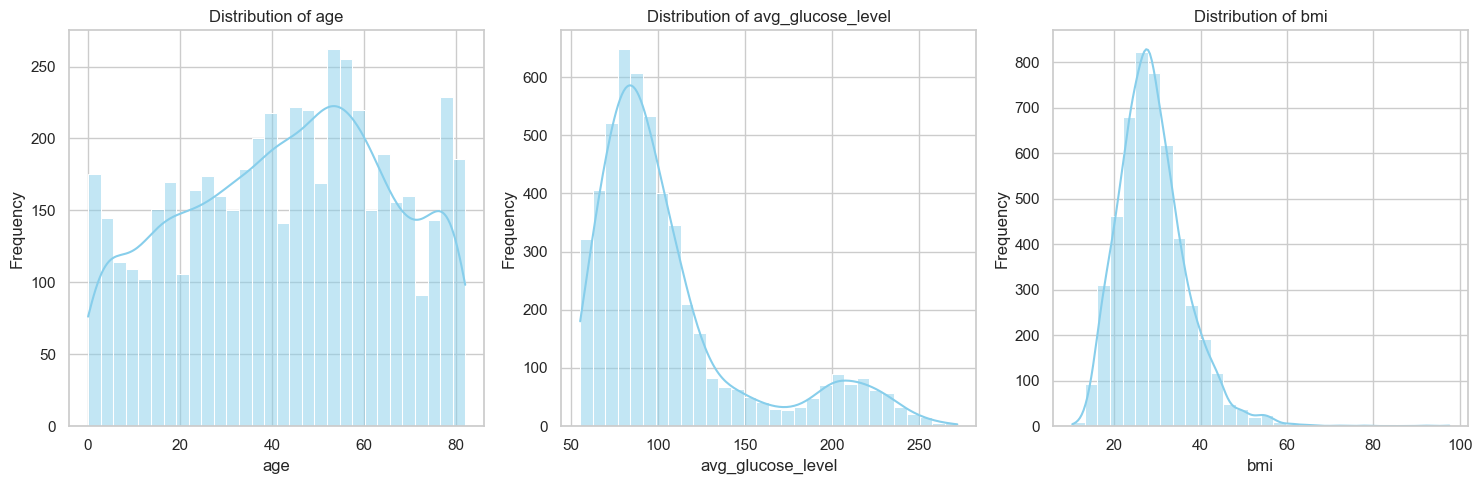

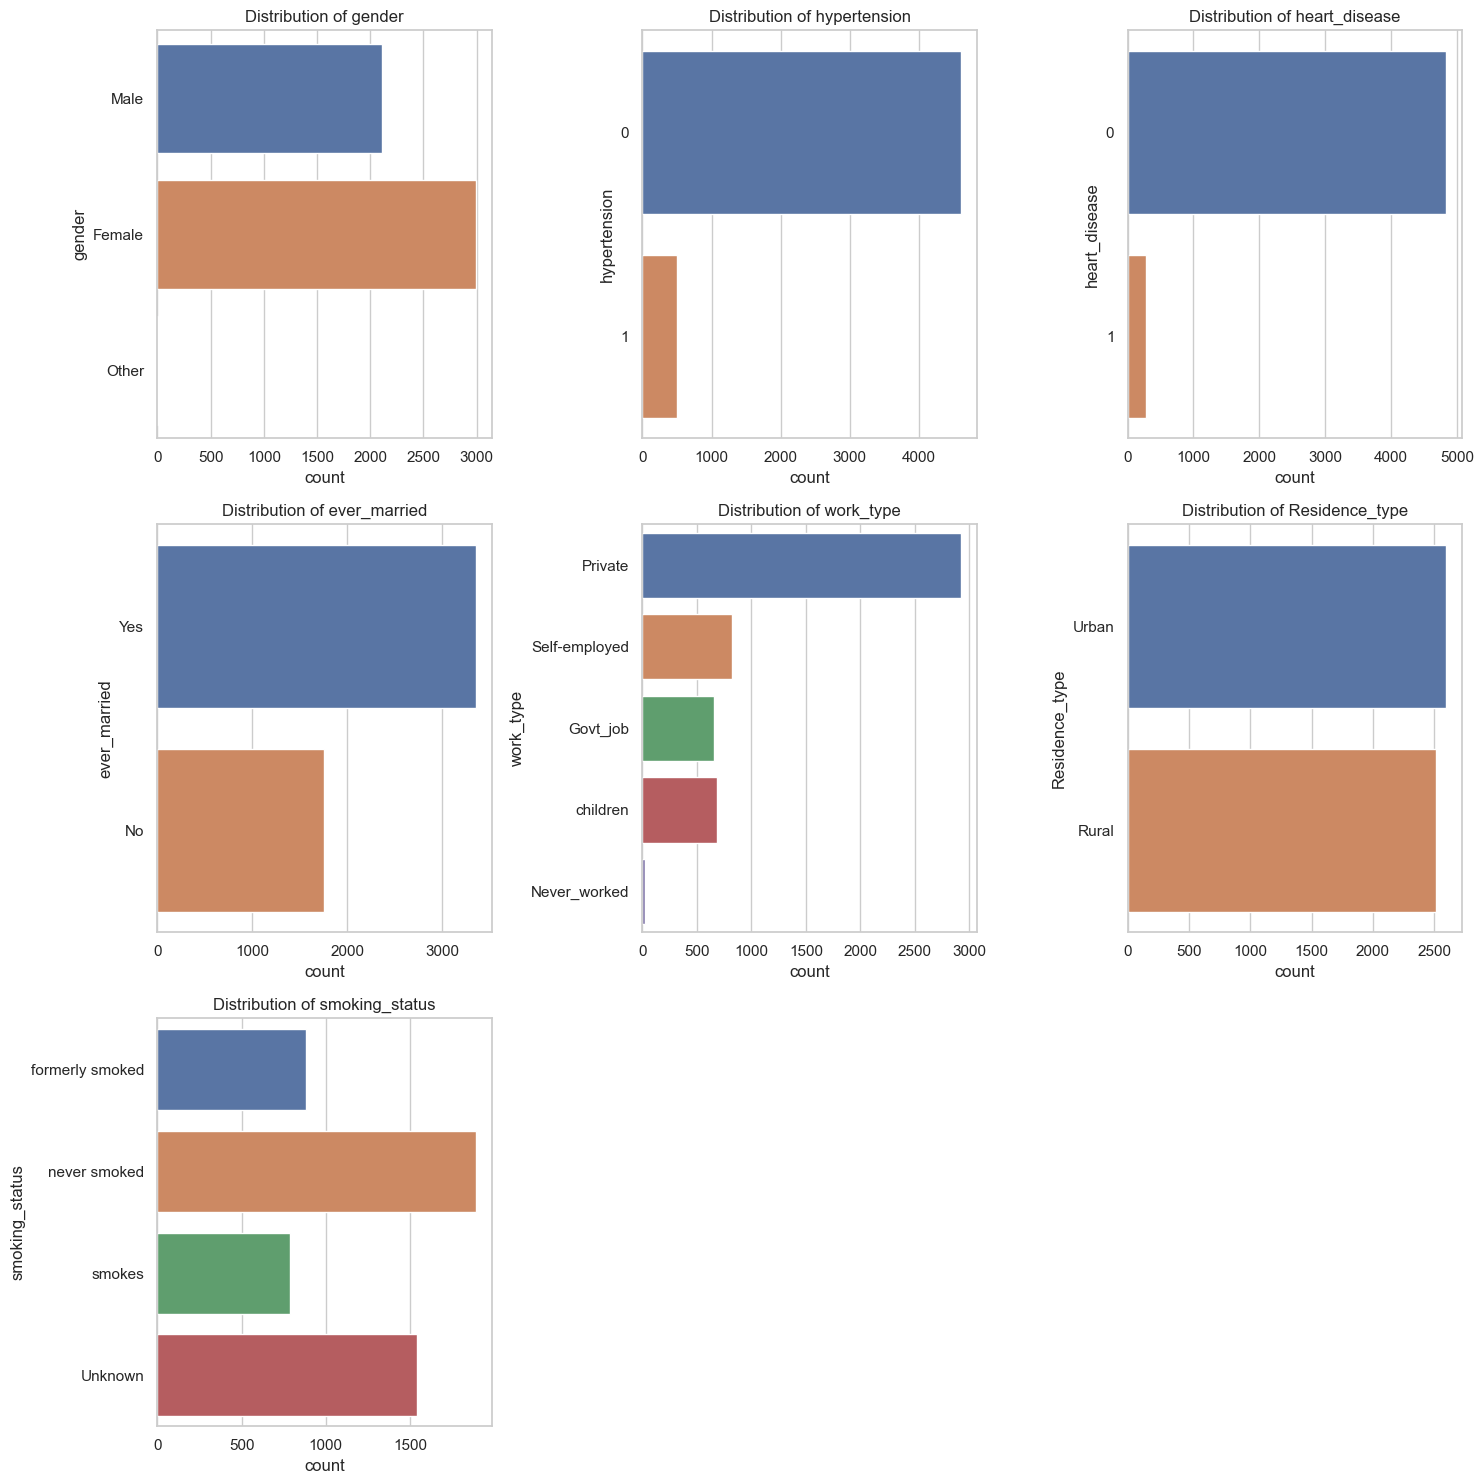

In [8]:
# Set the aesthetic style of the plots
sns.set_theme(style="whitegrid")  

#Numerical features for distribution analysis
numerical_features = ['age', 'avg_glucose_level', 'bmi']

# Plot the distribution of numerical features
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()  
plt.show()



#Categorical features for distribution analysis
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Plot the distribution of categorical features
plt.figure(figsize=(15, 15))
for i, feature in enumerate(categorical_features, 1):    
    plt.subplot(3, 3, i)
    sns.countplot(y=df[feature])
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()  

Numerical Features Distribution
The histograms for numerical features (age, average glucose level, and BMI) provide insights into their distributions:

Age: The distribution appears somewhat uniform with a slight increase in frequency towards older age groups. This suggests a wide range of ages among the participants.
Average Glucose Level: This feature shows a right-skewed distribution, indicating that most participants have glucose levels in the lower range, with fewer participants having high glucose levels.
BMI: The distribution of BMI is slightly right-skewed, similar to the average glucose level, indicating that most participants have BMI values in the middle range, with fewer participants having very high BMI values.


Categorical Features Distribution
The bar plots for categorical features reveal the following:

Gender: There are more female participants than male participants in the dataset.
Hypertension and Heart Disease: A small proportion of participants have hypertension or heart disease, indicating that these conditions are relatively rare in this dataset.
Ever Married: A majority of participants have been married.
Work Type: Private sector work is the most common, followed by self-employed and Govt_job. There are fewer participants who have never worked or are children.
Residence Type: Participants are almost evenly split between urban and rural residence types.
Smoking Status: A significant portion of participants have never smoked, followed by those who formerly smoked and currently smoke. A considerable number of entries are marked as "Unknown", which may need special attention in preprocessing.

# Outliers Detection

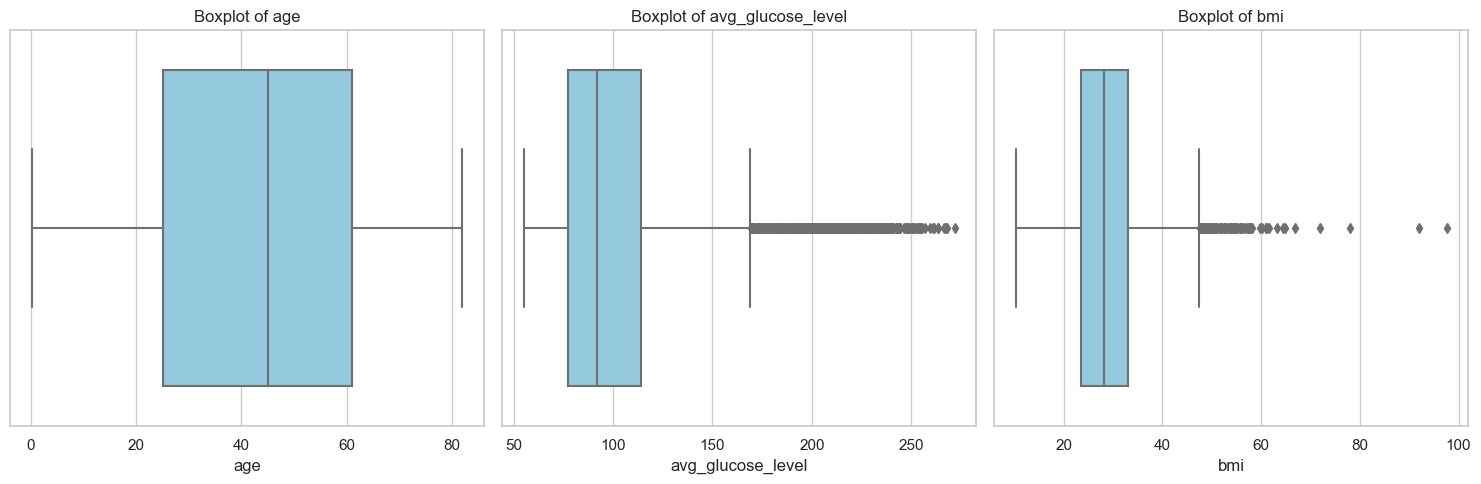

In [9]:
#Plot boxplot for numerical features to check for outliers
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=df[feature], color='skyblue')
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

The box plots for the numerical features reveal the presence of outliers in the dataset:

Age: Does not appear to have significant outliers, which aligns with the expected range of ages from 0 to 82 years.

Average Glucose Level: Shows several outliers above the upper whisker, indicating that some participants have unusually high glucose levels compared to the rest of the population.

BMI: Also demonstrates a number of outliers on the higher end, suggesting that a subset of participants have BMI values significantly above the general population.

TO-DO:

Handling Outliers
The presence of outliers in average glucose level and BMI requires careful consideration. Depending on the objectives of the analysis and the nature of the outliers, several strategies can be employed:

Trimming (Removing) Outliers: This approach involves removing data points that are considered outliers. While simple, it can lead to loss of valuable information and is not always advisable.

Capping (Winsorizing): Outliers are capped at a certain percentile of the data. For instance, values beyond the 95th percentile could be set to the value at the 95th percentile.

Transformation: Applying transformations (e.g., log, square root) to reduce the impact of outliers, especially for highly skewed data.
Robust Scaling: Using scaling methods that are less sensitive to outliers, such as RobustScaler in scikit-learn, which scales data according to the percentile range.

### Correlation Matrix for numerical features including the target variable 'stroke'

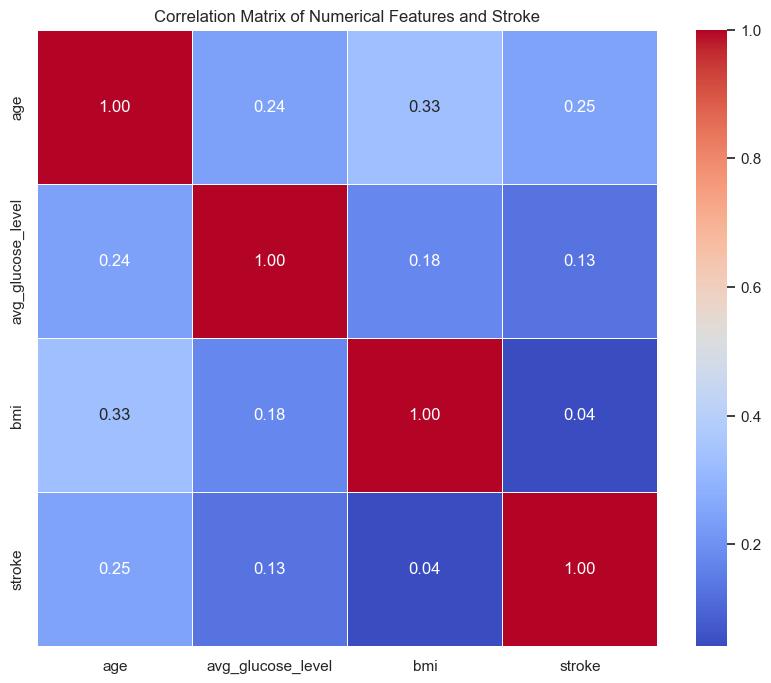

In [10]:
correlation_matrix = df[numerical_features + ['stroke']].corr()

#plot the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix of Numerical Features and Stroke') 
plt.show()

The correlation matrix, visualized as a heatmap, reveals the relationships between numerical features and the target variable (stroke), as well as among the numerical features themselves. Key observations include:

Age and Stroke: Age shows a positive correlation with the stroke variable (approximately 0.25), suggesting that older individuals might have a higher risk of stroke. This is an expected and medically supported relationship.

Average Glucose Level and Stroke: There's a positive correlation (around 0.13) between average glucose level and stroke, indicating that higher glucose levels might be associated with a higher risk of stroke, though the correlation is not as strong as with age.

BMI and Stroke: The correlation between BMI and stroke is very weak (around 0.04), suggesting that BMI, on its own, might not be a strong predictor of stroke in this dataset.

Inter-feature Correlation: Among the numerical features, correlations are generally low, indicating there is no significant multicollinearity issue between these features. This is beneficial for many machine learning models, as high multicollinearity can be problematic.

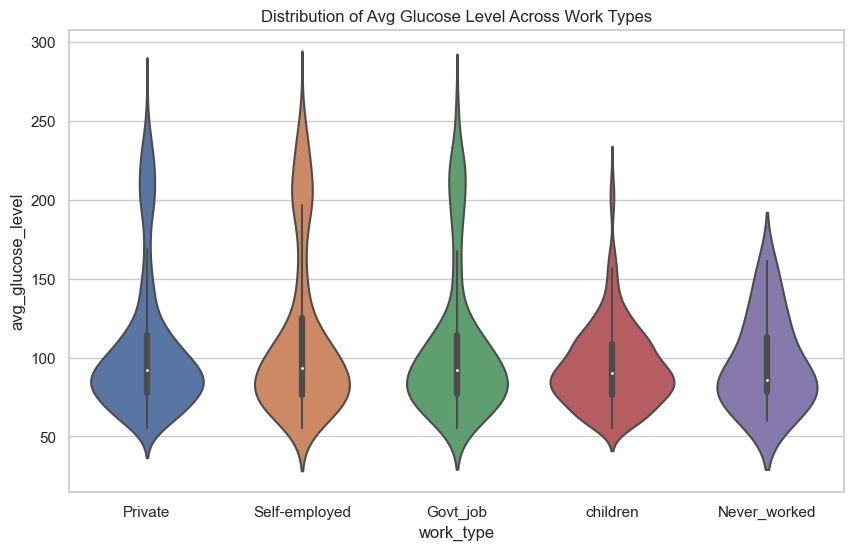

In [11]:
# Create violin plots for avg_glucose_level across different work_type categories
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='work_type', y='avg_glucose_level')
plt.title('Distribution of Avg Glucose Level Across Work Types')
plt.show()


The violin plot displays the distribution of average glucose levels across different work types. Key observations include:

The distribution shapes vary among the different work categories, indicating differences in glucose level distributions based on work type.

For most work types, the median glucose level is around the same range, but the distribution (spread and tails) differs. For instance, Self-employed individuals show a wider distribution, suggesting more variability in glucose levels within this group.

The children category naturally shows a lower average glucose level with a much narrower distribution, which aligns with expectations given the lower likelihood of children having elevated glucose levels.

Other categories like Private, Govt_job, and Never_worked exhibit specific patterns in their distributions, with some showing long tails towards higher glucose levels, indicating the presence of individuals with significantly high glucose levels within those work types.

These insights can help in understanding how different factors, such as the type of work, may be associated with health metrics like glucose levels, potentially indicating lifestyle impacts on health.

c:\Users\eakli\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\eakli\AppData\Local\Temp\ipykernel_6780\4224068767.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


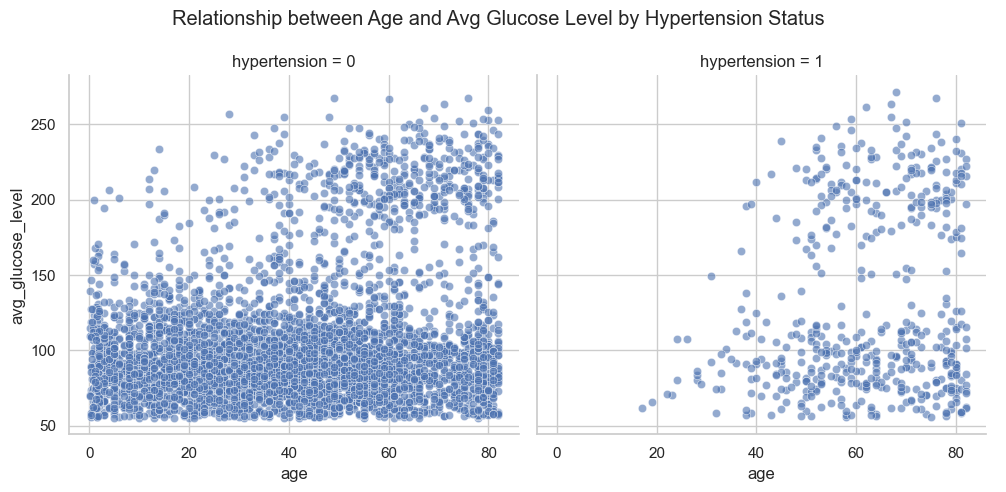

In [12]:
# Create a Facet Grid plotting the relationship between age and avg_glucose_level, segmented by hypertension
g = sns.FacetGrid(df, col='hypertension', height=5, aspect=1)
g = g.map(sns.scatterplot, 'age', 'avg_glucose_level', alpha=0.6)
g.add_legend()
plt.subplots_adjust(top=0.9)
g.figure.suptitle('Relationship between Age and Avg Glucose Level by Hypertension Status')
plt.tight_layout()
plt.show()


The Facet Grid visualizes the relationship between age and average glucose level, segmented by the hypertension status of individuals. The insights include:

Without Hypertension: In individuals without hypertension, while there's a general increase in glucose levels with age, the spread and concentration of data points suggest a wide variability in glucose levels across ages. The scatter is relatively dense around the middle age range, indicating a large number of individuals with moderate glucose levels.

With Hypertension: For individuals with hypertension, there seems to be a slightly more pronounced upward trend in glucose levels with age. The distribution of glucose levels appears wider in older age groups, suggesting that older individuals with hypertension might be more likely to have elevated glucose levels.

The segmentation by hypertension status reveals that hypertension could be associated with higher glucose levels, especially as individuals age. This visualization underscores the importance of considering multiple health indicators together to understand potential risk factors better.

# Preprocessing: Impute missing values

In [13]:
#impute missing values in bmi column with the median
df['bmi'] = df['bmi'].fillna(df['bmi'].median())    

#Given that the bmi distribution is slightly right-skewed, we'll use the median for imputation to avoid the influence of outliers.

#check if there are still missing values
missing_values_after_imputation = df.isnull().sum()

missing_values_after_imputation

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

c:\Users\eakli\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


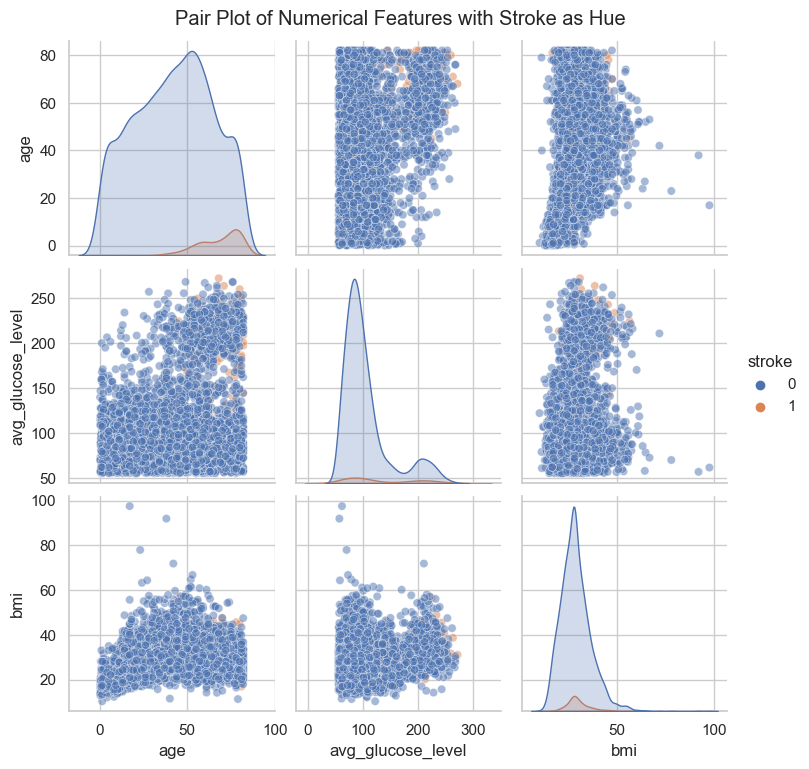

In [14]:
# Subset of numerical features and the target for pair plot
subset_features = ['age', 'avg_glucose_level', 'bmi', 'stroke']

# Create pair plots
sns.pairplot(df[subset_features], hue='stroke', plot_kws={'alpha':0.5})
plt.suptitle('Pair Plot of Numerical Features with Stroke as Hue', y=1.02)
plt.show()


In [15]:
df.stroke.value_counts()  


stroke
0    4861
1     249
Name: count, dtype: int64

In [16]:
df.stroke.value_counts(True).mul(100).round(2).astype(str) + '%'    
# High class imbalance in the target variable   

stroke
0    95.13%
1     4.87%
Name: proportion, dtype: object

<Axes: xlabel='stroke', ylabel='count'>

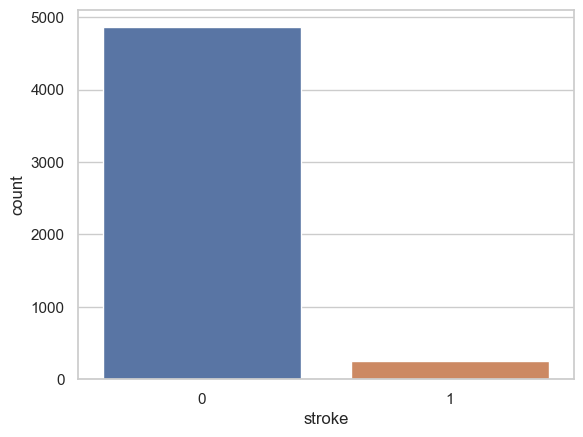

In [17]:
sns.countplot(x='stroke', data=df)

<Axes: xlabel='stroke'>

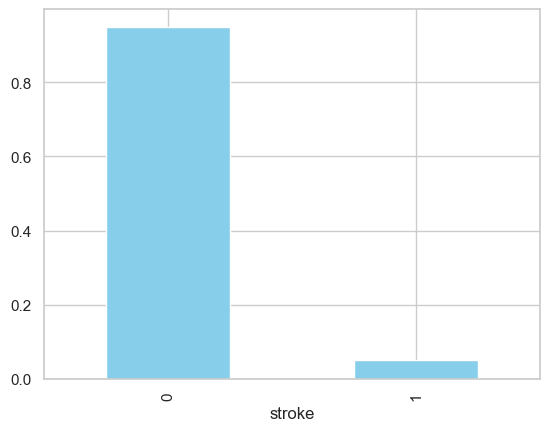

In [18]:
df.stroke.value_counts(normalize=True).round(2).plot(kind='bar', color='skyblue')


# Splitting data into training and testing